In [23]:
import numpy as np
import pandas as pd
import sys
import glob
import os,time

# plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own dataclass
from imp import reload
import coronadataclass as cdc; reload(cdc);

np.seterr(divide = 'ignore', invalid = 'ignore')


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [24]:
data = cdc.CoronaData(download_data = True)

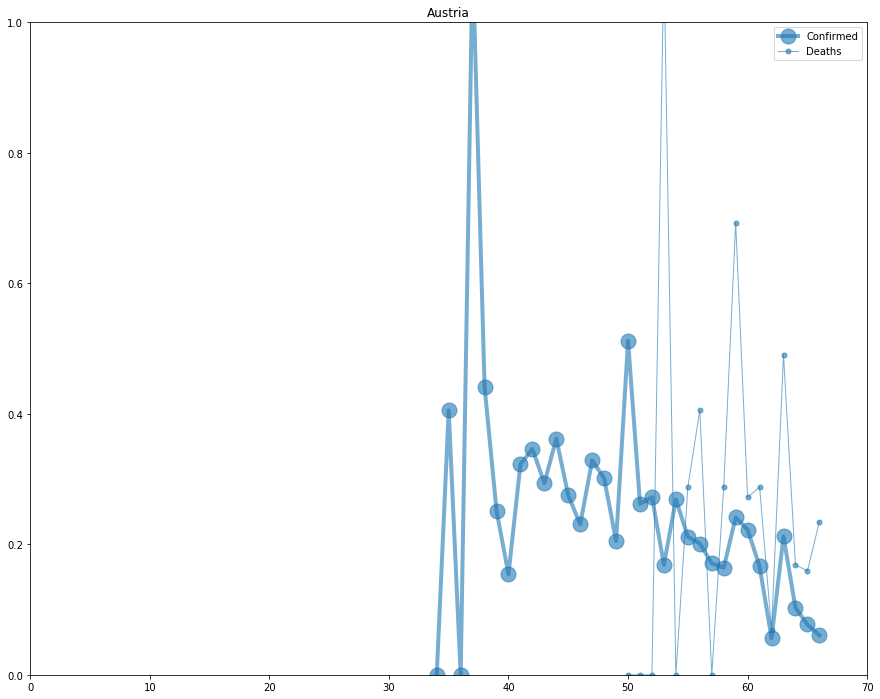

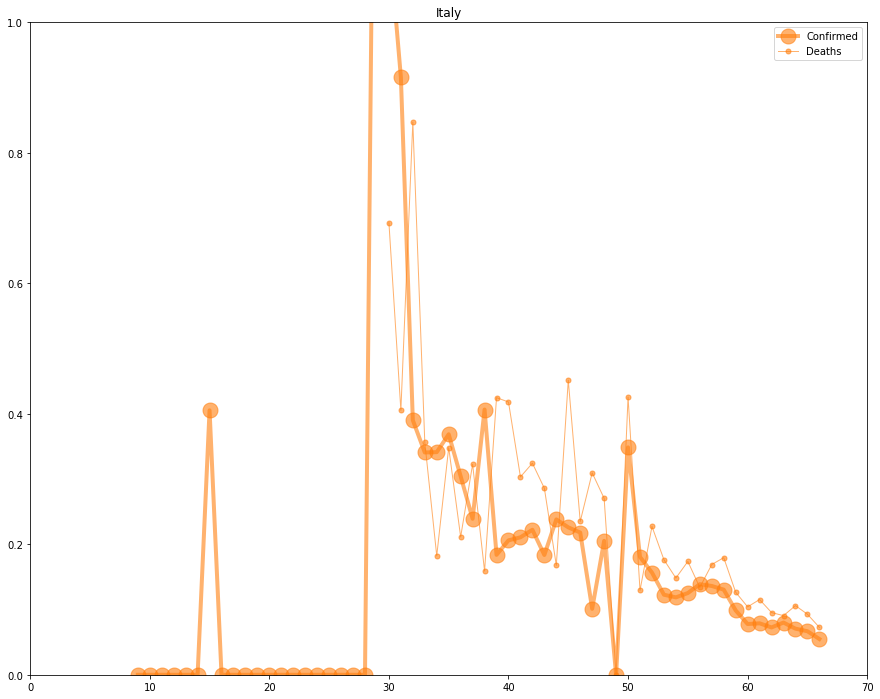

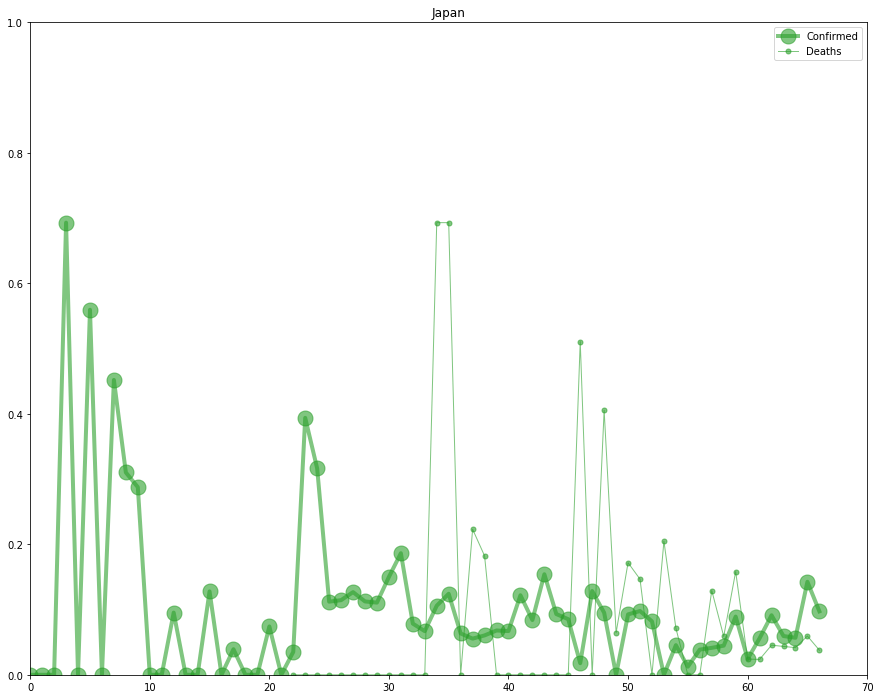

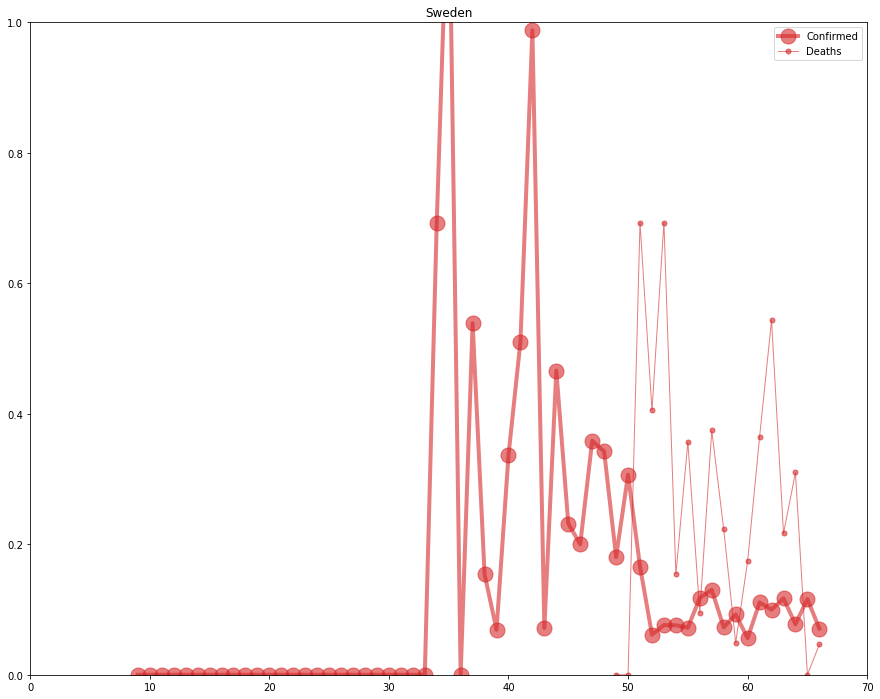

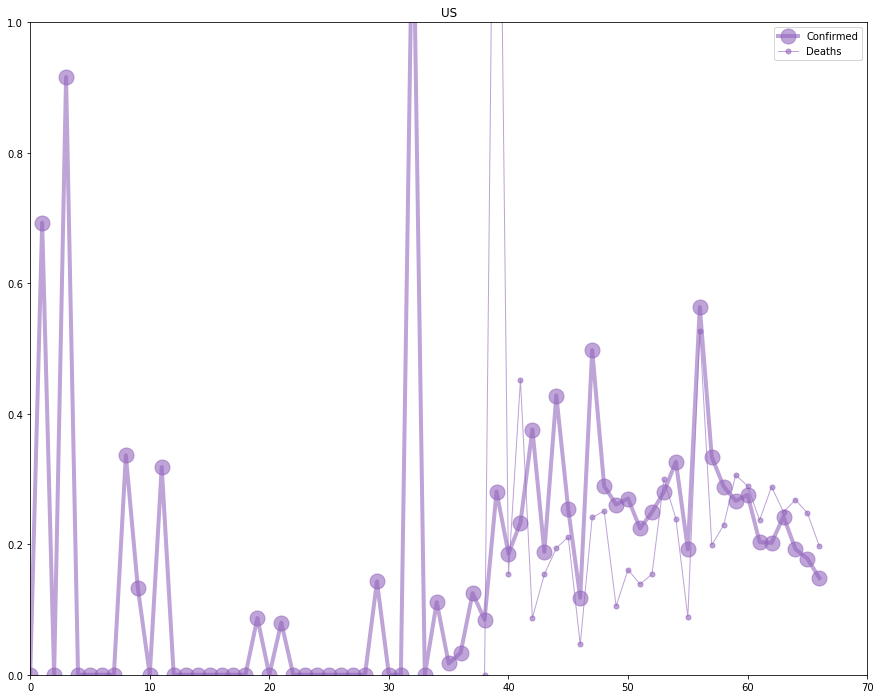

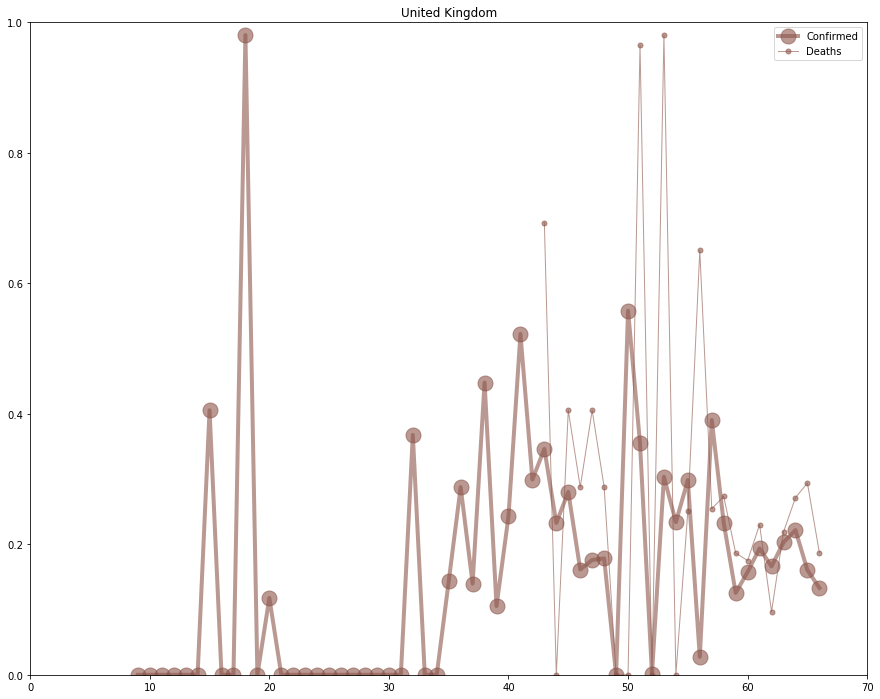

In [25]:
specialcountries = ['Austria', 'Italy', 'Sweden', 'Japan', 'US', 'United Kingdom', 'Korea']
colornames       = [cn for cn in matplotlib.colors.TABLEAU_COLORS.keys() if (cn.upper() != 'TAB:WHITE' and cn.upper() != 'TAB:GRAY')]
x                = np.arange(len(data)-1)
i = 0
for country, countrydata in data:
    if country in specialcountries:
        daily_change_rate_confirmed = np.diff(np.log(countrydata['Confirmed']))
        daily_change_rate_deaths    = np.diff(np.log(countrydata['Deaths']))
        plt.plot(x,daily_change_rate_confirmed,marker = 'o',c = colornames[i%len(colornames)], label = 'Confirmed', lw = 4, markersize = 15, alpha = .6)
        plt.plot(x,daily_change_rate_deaths,   marker = '.',c = colornames[i%len(colornames)], label = 'Deaths',    lw = 1, markersize = 10, alpha = .6)
        plt.title(country)
        i+=1
        plt.ylim([0,1])
        plt.xlim([0,70])
        plt.legend()
        plt.show()